In [1]:
import numpy as np

from py.simulation import *
from py.estimation import *
from py.features import *
from py.utils import *
from py.learner import *

from SpringRank import SpringRank
from importlib import reload
from scipy.optimize import root

from matplotlib import pyplot as plt

In [15]:
n_rounds = 400
n = 70
m_updates = 3

# A = np.random.randint(10, size = (n, n))
A = np.random.randint(10, size = (n,n))
A0 = A/A.sum()*m_updates*n

beta = np.array([2.9, -1.5])
lam = .9

In [16]:
L = learner()

L.set_score(
#     score_function = lambda A: A.sum(axis = 0)**.5
    score_function = lambda A: SpringRank.SpringRank(A.T)
)

def quadratic_feature(s):
    S = np.tile(s, (n,1))
    F = (S - S.T)**2
    return(F)

L.set_features([
    lambda s: np.tile(s, (n,1)),
    quadratic_feature,
])

In [17]:
# generate some fake data

T = L.simulate(beta = beta, 
               lam = lam, 
               A0 = A0,
               n_rounds = n_rounds,
               update = stochastic_update,
               m_updates = m_updates)

In [18]:
# with known parameters, infer the rate matrix from the fake data

L.set_data(T, T[0])
L.compute_state_matrix(lam = lam)
L.compute_score()
L.compute_features()
L.compute_rate_matrix(beta = beta)

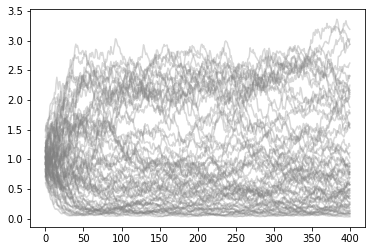

In [19]:
p = plt.plot(L.GAMMA.sum(axis = 1), color = 'grey', alpha = .3)

In [245]:
# only works since we know true lam
L.ML_pars(b0 = np.array([0,0]))

      fun: 32145.981804165902
 hess_inv: array([[ 2.22768164e-03, -6.45682121e-06],
       [-6.45682121e-06,  3.09623783e-06]])
      jac: array([0.        , 0.00024414])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 121
      nit: 15
     njev: 30
   status: 2
  success: False
        x: array([ 2.89223932, -1.58433694])

In [246]:
res = L.ML(lam0 = .7, 
           alpha0 = 10**(-4), 
           tol = 10**(-1), 
           step_cap = .05,
           print_updates = True)

computing memory hyperparameter lambda
Lambda = 0.75, LL = 32229.79760337949
Lambda = 0.8, LL = 32192.72845258923
Lambda = 0.8500000000000001, LL = 32162.251310538853
Lambda = 0.9000000000000001, LL = 32145.982408444703
Lambda = 0.9041775833669818, LL = 32145.85566269786
Lambda = 0.9037791751474289, LL = 32145.855590443567
computing parameter vector beta


In [247]:
H = L.estimate_hessian(res['lam'], res['beta']) # probably takes a while

In [248]:
np.sqrt(np.diag(np.linalg.inv(-H)))

array([0.0077606 , 0.1022894 , 0.11555315])

In [249]:
res

{'lam': 0.9037791751474289,
 'beta': array([ 2.93139845, -1.62514439]),
 'LL': -32145.855590443494}